In [1]:
from environment.gym_quadrotor import DroneEnv, get_simple_direction

In [2]:
env = DroneEnv(num_agents=1, PROB=(0.,1.0), SIZE=(4,4))

In [11]:
valid_dataset = []
for _ in range(20):
    env = DroneEnv(num_agents=8, PROB=(0,1.0), SIZE=(4,4))
    valid_dataset.append((env.world.obstacles.copy(), env.world.agent_goals.copy(), env.world.agents.copy()))

20it [1:05:51, 197.55s/it]


0.0375 0.95 125.95


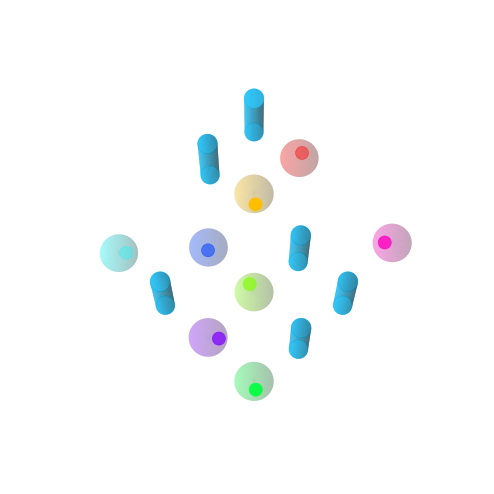

In [13]:
from potential_field import infer_p
from tqdm import tqdm
from copy import deepcopy
from environment.utils import save_gif
import numpy as np

collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = DroneEnv(num_agents=8, PROB=(0,0), SIZE=(4,4))
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    collided, done, gifs = infer_p(env, K1=100, n_candidates=1000, ignore_agent=False)
    save_gif(gifs, 'gifs/potential/drone/4_8_'+str(v_idx)+'_'+str(np.any(collided))+'_'+str(done)+'.gif')
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.mean(collideds), np.mean(dones), np.mean(lengths))

20it [45:44, 137.22s/it]


0.10625 0.95 126.55


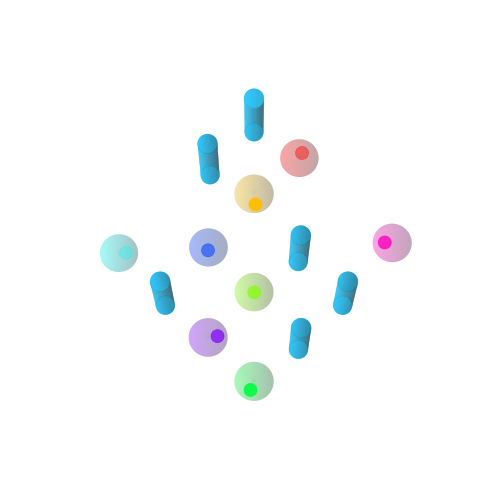

In [14]:
from potential_field import infer_p
from tqdm import tqdm
from copy import deepcopy
from environment.utils import save_gif
import numpy as np

collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = DroneEnv(num_agents=8, PROB=(0,0), SIZE=(4,4))
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    collided, done, gifs = infer_p(env, K1=100, n_candidates=1000, ignore_agent=True)
    save_gif(gifs, 'gifs/potential/drone/4_ignore_8_'+str(v_idx)+'_'+str(np.any(collided))+'_'+str(done)+'.gif')
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.mean(collideds), np.mean(dones), np.mean(lengths))

20it [32:12, 96.64s/it] 


0.2375 1.0 95.55


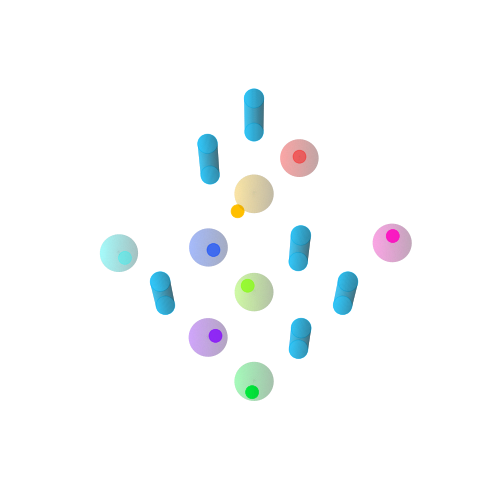

In [15]:
from potential_field import infer_p
from tqdm import tqdm
from copy import deepcopy
from environment.utils import save_gif
import numpy as np

collideds = []
dones = []
lengths = []
for v_idx, data in tqdm(enumerate(valid_dataset)):
    env = DroneEnv(num_agents=8, PROB=(0,0), SIZE=(4,4))
    env.world.obstacles, env.world.agent_goals, env.world.agents = deepcopy(data)
    collided, done, gifs = infer_p(env, K1=0, n_candidates=1000, ignore_agent=True)
    save_gif(gifs, 'gifs/potential/drone/4_ignoreobs_8_'+str(v_idx)+'_'+str(np.any(collided))+'_'+str(done)+'.gif')
    collideds.append(collided)
    dones.append(done)
    lengths.append(len(gifs))
    
print(np.mean(collideds), np.mean(dones), np.mean(lengths))

In [ ]:
from environment.gym_quadrotor import DroneEnv, get_simple_direction
from tqdm import tqdm
import numpy as np
env = DroneEnv(5, (8,8), (0, 0.3))

In [ ]:
env = DroneEnv(5, (8,8), (-1,0))
gifs = [env._render()]

In [ ]:
env.world.agents

 42%|████▏     | 126/300 [01:34<02:10,  1.33it/s]


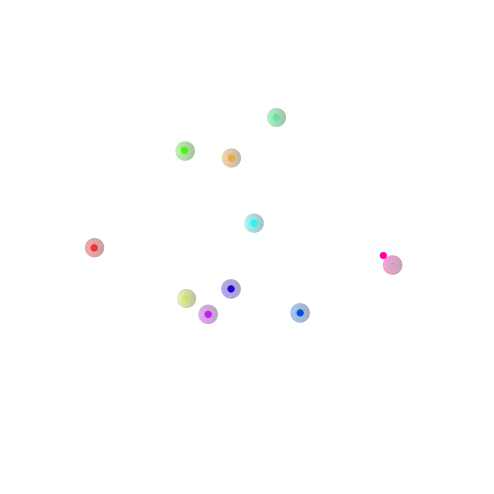

In [3]:
from tqdm import tqdm
import numpy as np
env = DroneEnv(num_agents=8, PROB=(0,0.0), SIZE=(4,4))
gifs = [env._render()]
actions = []
for _ in tqdm(range(300)):
    a = get_simple_direction(env.world.agents, env.world.agent_goals)
    _, _, _, _ = env.step(a)
    actions.append(a)
    gifs.append(env._render())
    if env.world.done():
        break

from environment.utils import save_gif
save_gif(gifs, 'drone.gif')

In [4]:
np.array(actions).reshape(-1,4).min(axis=0), np.array(actions).reshape(-1,4).max(axis=0)

(array([-7.4637711e-01, -9.8807168e-01, -9.8807168e-01, -6.1906216e-14],
       dtype=float32),
 array([7.7490520e-01, 9.8807168e-01, 9.8807168e-01, 5.1811606e-14],
       dtype=float32))

In [ ]:
from environment.utils import save_gif
save_gif(gifs, 'drone.gif')

In [ ]:
%debug

In [ ]:
actions = []
xs = []
require_step = []
for _ in tqdm(range(1000)):
    env = DroneEnv(1, (8,8), (-1e-9, 0))
    require_step.append(0)
    while not env.finished:
        a = get_simple_direction(env)
        x = env._step(a, None)[0]['x'][0, :].data.cpu().numpy()
        
        actions.append(a)
        xs.append(x)
        require_step[-1] += 1

In [ ]:
np.array(actions).min(axis=0), np.array(actions).max(axis=0)

In [ ]:
np.array(xs).min(axis=0), np.array(xs).max(axis=0)

In [ ]:
np.array(require_step).min(axis=0), np.array(require_step).max(axis=0)

In [ ]:
actions = []
xs = []
require_step = []
for _ in tqdm(range(1000)):
    env = DroneEnv(1, (30,30), (-1e-9, 0))
    require_step.append(0)
    while not env.finished:
        a = get_simple_direction(env)
        x = env._step(a, None)[0]['x'][0, :].data.cpu().numpy()
        
        actions.append(a)
        xs.append(x)
        require_step[-1] += 1

print(np.array(actions).min(axis=0), np.array(actions).max(axis=0), '\n', np.array(xs).min(axis=0), np.array(xs).max(axis=0))

In [ ]:
np.array(require_step).min(axis=0), np.array(require_step).max(axis=0)

In [ ]:
env.world.agent_goals

In [ ]:
require_step

In [ ]:
import torch
from torch_cluster import knn_graph
x = torch.Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1], [0, 0]])
edge_index = knn_graph(x, k=2, batch=None, loop=True)

In [ ]:
edge_index

In [ ]:
pairs = x[edge_index]

In [ ]:
(pairs[0] - pairs[1]).norm(dim=-1)

In [ ]:
from torch_cluster import radius_graph, radius
x = torch.Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]])
edge_index = radius(x, torch.Tensor([[0, 0]]), r=2)
edge_index

In [ ]:
edge_index.T.numpy().tolist()